Installing seaborn.  done

Historgrams

In [4]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn

In [7]:
#Stats
from scipy import stats
#Charts and vis
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#To show vis after each cell
%matplotlib inline

In [9]:
dataset1 = randn(100)

(array([ 3.,  9., 12.,  8., 26., 18., 11.,  8.,  2.,  3.]),
 array([-2.35918264, -1.87173247, -1.38428229, -0.89683212, -0.40938195,
         0.07806822,  0.56551839,  1.05296857,  1.54041874,  2.02786891,
         2.51531908]),
 <a list of 10 Patch objects>)

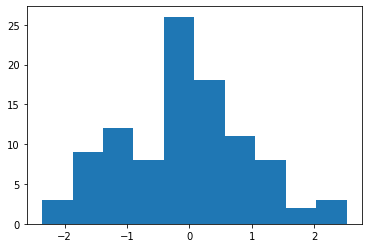

In [10]:
plt.hist(dataset1)

ten bins is the standard that plt.method creates

(array([ 2.,  2.,  9., 12., 10., 15., 14.,  4., 10.,  2.]),
 array([-2.43123179, -1.96928883, -1.50734587, -1.04540291, -0.58345995,
        -0.12151699,  0.34042596,  0.80236892,  1.26431188,  1.72625484,
         2.1881978 ]),
 <a list of 10 Patch objects>)

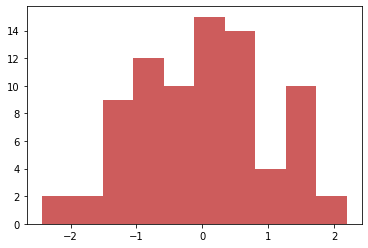

In [11]:
dataset2 = randn(80)

plt.hist(dataset2,color='indianred')
                 

(array([0.05411924, 0.05411924, 0.05411924, 0.05411924, 0.16235771,
        0.32471542, 0.27059618, 0.37883465, 0.32471542, 0.21647694,
        0.16235771, 0.64943083, 0.43295389, 0.32471542, 0.10823847,
        0.10823847, 0.27059618, 0.27059618, 0.05411924, 0.05411924]),
 array([-2.43123179, -2.20026031, -1.96928883, -1.73831735, -1.50734587,
        -1.27637439, -1.04540291, -0.81443143, -0.58345995, -0.35248847,
        -0.12151699,  0.10945449,  0.34042596,  0.57139744,  0.80236892,
         1.0333404 ,  1.26431188,  1.49528336,  1.72625484,  1.95722632,
         2.1881978 ]),
 <a list of 20 Patch objects>)

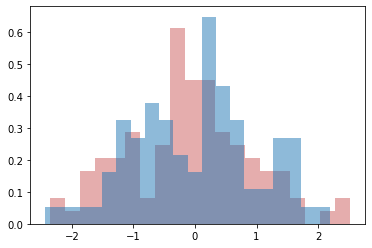

In [17]:
plt.hist(dataset1,density=True, color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,density=True, alpha=0.5, bins=20)
#instructor used normed=True which was deprecated to density=True to make different amount of bins normalize
#alpha was to make the histrogram a bit transparent

In [18]:
data1 = randn(1000)
data2 = randn(1000)


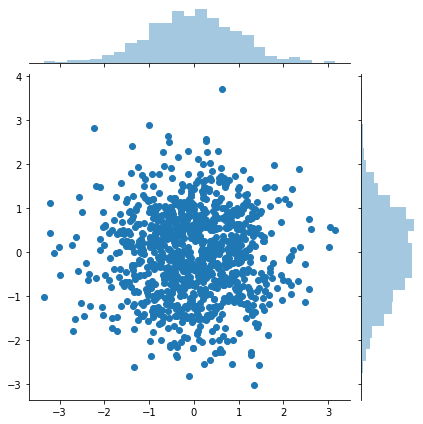

In [19]:
sns.jointplot(data1,data2)

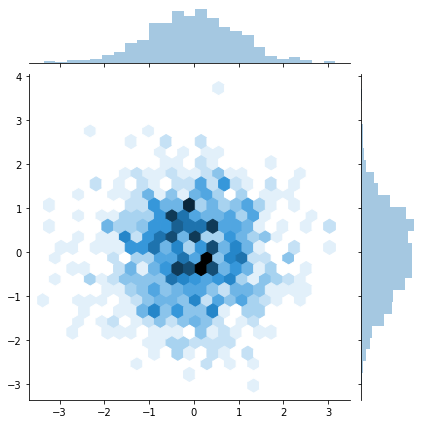

In [20]:
sns.jointplot(data1,data2,kind='hex')

Kernel estimation density estimation plots or KDE plots

In [28]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
from scipy import stats

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
%matplotlib inline

In [61]:
dataset = randn(25)
dataset

array([-0.69704862, -0.76275419,  1.56643309,  0.07749418, -0.11496471,
        1.01985367,  1.71432831,  0.26766209,  0.48275318, -0.18139446,
        1.45979204,  0.74967734,  0.21637459, -1.55038307,  1.31457949,
       -0.2131532 , -0.65184099,  0.19077667, -0.10787981, -2.31650675,
       -0.12336828,  0.57709075, -1.14567537,  0.11129099, -1.18895416])

(0.0, 1.0)

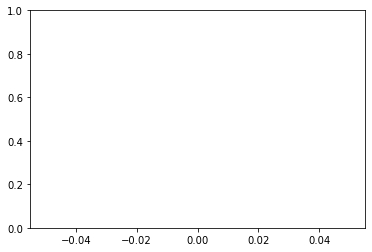

In [62]:
sns.rugplot(dataset,height=1)
plt.ylim(0,1)

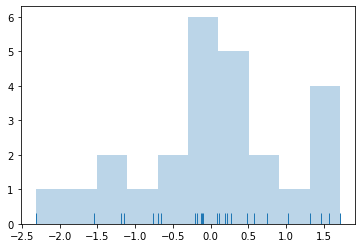

In [63]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

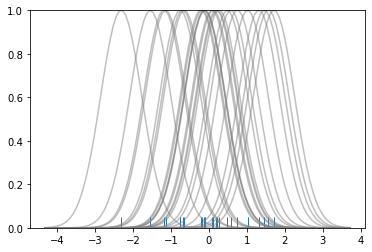

In [66]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel - kernel * .4
    
    plt.plot(x_axis,kernel,color='grey', alpha = .5)
    
plt.ylim(0,1)

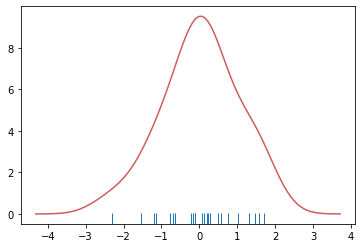

In [67]:
sum_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_kde, color = 'indianred')
sns.rugplot(dataset)

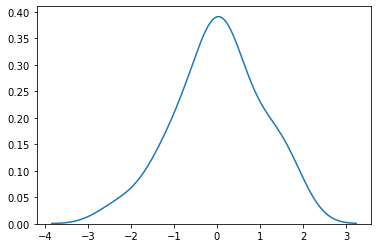

In [68]:
sns.kdeplot(dataset)

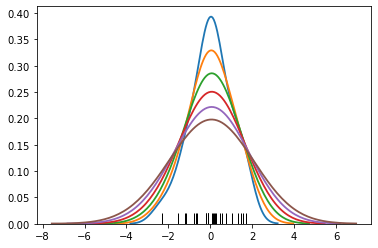

In [69]:
sns.rugplot(dataset,color= 'black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8)


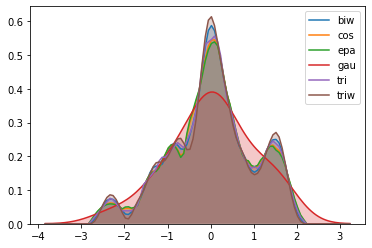

In [72]:
kernel_opt = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_opt:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade = True)

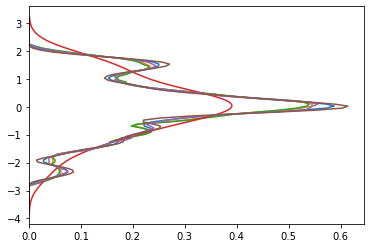

In [73]:
kernel_opt = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_opt:
    sns.kdeplot(dataset,kernel=kern, vertical= True)

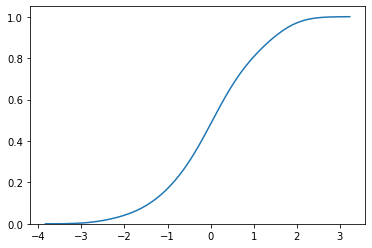

In [74]:
sns.kdeplot(dataset,cumulative = True)
#this is to create CDF instead of PDF shown in the examples above

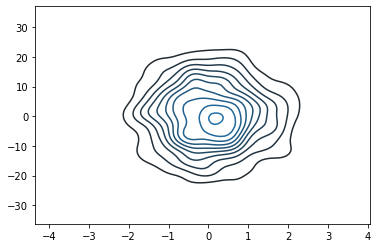

In [81]:
mean = [0,0]
cov = [[1,0],[0,100]]
x,y = np.random.multivariate_normal(mean,cov,1000).T
dframe = sns.kdeplot(x,y)
dframe
#using instructor's example of 
#'dataset2 = np.random.multivariate_normal(mean,cov,1000)'
#dframe = pd.DataFrame(dataset2,columns=['X','Y'])
#sns.kdeplot(dframe)
# gave deprecation error.  changing to x,y method with .T at end fixed.  Not sure why though.

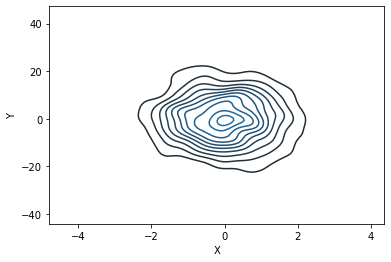

In [82]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe.X, dframe.Y)

#using instructor's example of 
#'dataset2 = np.random.multivariate_normal(mean,cov,1000)'
#dframe = pd.DataFrame(dataset2,columns=['X','Y'])
#sns.kdeplot(dframe)
# gave deprecation error.  changing to x,y method with .T at end fixed. 
#Now I understand that I could give the .X and .Y versions to sns.kdeplot to get the same output.

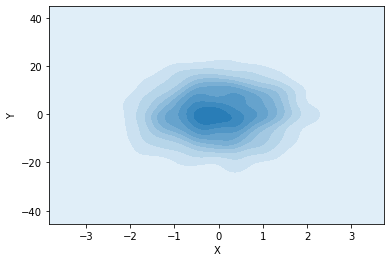

In [83]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe.X, dframe.Y,shade = True)

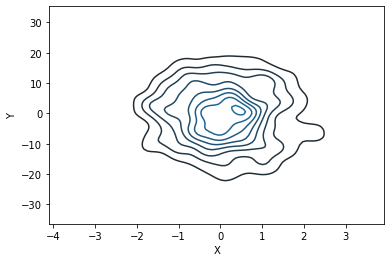

In [84]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe.X, dframe.Y,bw='silverman')

Combining plot styles

In [85]:
dataset = randn(100)

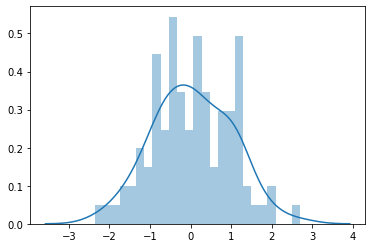

In [87]:
sns.distplot(dataset,bins=25)

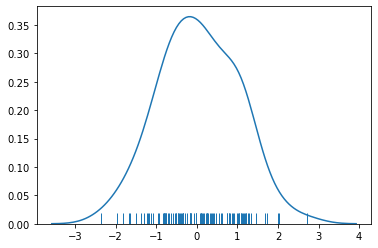

In [88]:
sns.distplot(dataset,bins=25,rug=True, hist=False)

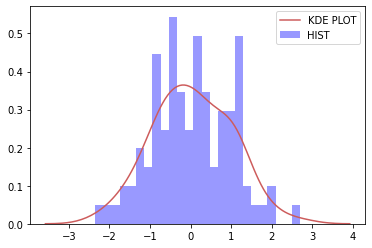

In [90]:
sns.distplot(dataset,bins=25,
             kde_kws = {'color' : 'indianred', 'label' : 'KDE PLOT'}, hist_kws ={'color':'blue', 'label' : 'HIST'})

In [91]:
ser1 = Series(dataset,name='my_data')

In [92]:
ser1

0    -0.816261
1     1.087783
2     2.011674
3     0.905834
4     1.153079
        ...   
95    1.277128
96   -0.179285
97   -0.548236
98   -1.388274
99   -1.223840
Name: my_data, Length: 100, dtype: float64

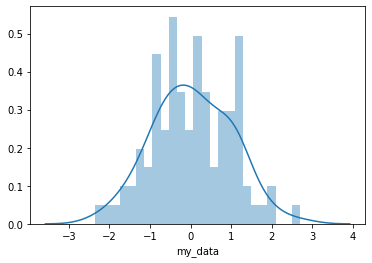

In [93]:
sns.distplot(ser1,bins=25)

box and violin plots - Even completing the relatively easy task of creating a couple of box plots that resembles what the instructor had, could not be done with his methods due to the nuances of changes to the software over time.  The instructor was able to create the box plots below using the sytnax:
    data1 = randn(100)
    data2 = randn(100)
    sns.boxplot([data1,data2])
Unfortunately, it took me some time to figure out that I had to put data= in front of the list for it to work correctly.  Even the shift tab notes didn't give me a clear answer.  Still the value of struggling a little to find the answer seems to help the knowledge stick.  I've been studying more statistics as I go through this course because my mathematics are woefully rusty.

In [94]:
data1 = randn(100)
data2 = randn(100) + 2

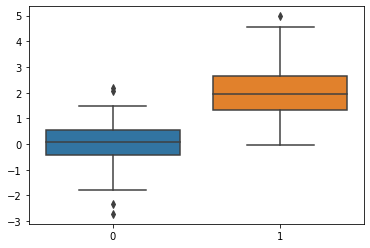

In [106]:
sns.boxplot(data = [data1,data2])

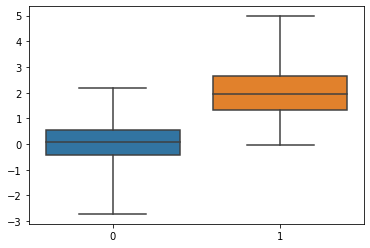

In [108]:
#The "whis=np.inf" allows your whiskers to extend to include outliers.
sns.boxplot(data = [data1,data2], whis=np.inf)

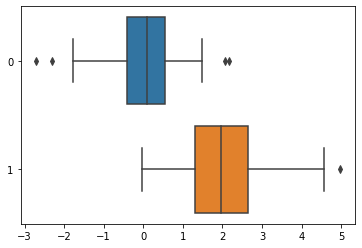

In [115]:
#Same issues with turning the box horizontally.  Instructor said use "sns.boxplot([data1,data2],whis=np.inf, vert = False)"
#It errored out.  After a quick look at shift tab docs, found that the orient switch had to be set along with quotes.
sns.boxplot(data = [data1,data2],orient="h")

Violin plots are similar but appear to combine the box plot with a kde plot

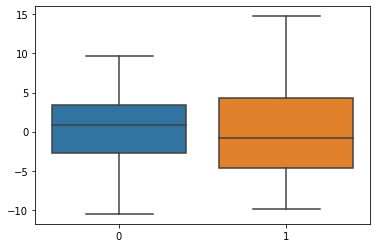

In [30]:
data1 = stats.norm(0,5).rvs(100)
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])
sns.boxplot(data=[data1,data2],whis=np.inf)

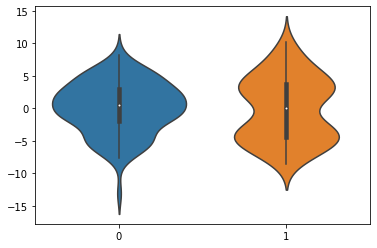

In [117]:
sns.violinplot(data=[data1,data2],whis=np.inf)

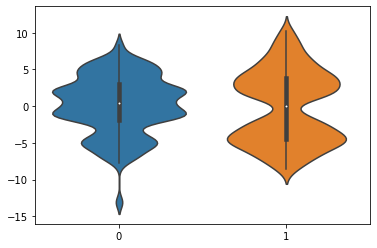

In [121]:
#bandwidth change
sns.violinplot(data=[data1,data2],bw=.2 ,whis=np.inf)

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns;sns.set(color_codes=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import Series,DataFrame
from scipy import stats
%matplotlib inline

In [58]:
covid_df = pd.read_csv('COVID-19Surveillance_COVID-NET_Entire Network_Data.csv', sep=',')

In [60]:
covid_df

,CATCHMENT,NETWORK,YEAR,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,CUMULATIVE RATE,WEEKLY RATE
0,Entire Network,COVID-NET,2020,2020,10,0-4 yr,0.0,0.0
1,Entire Network,COVID-NET,2020,2020,11,0-4 yr,0.0,0.0
2,Entire Network,COVID-NET,2020,2020,12,0-4 yr,0.0,0.0
3,Entire Network,COVID-NET,2020,2020,13,0-4 yr,0.2,0.2
4,Entire Network,COVID-NET,2020,2020,14,0-4 yr,NaN,NaN
...,...,...,...,...,...,...,...,...
145,Entire Network,COVID-NET,2020,2020,35,65+ yr,NaN,NaN
146,Entire Network,COVID-NET,2020,2020,36,65+ yr,NaN,NaN
147,Entire Network,COVID-NET,2020,2020,37,65+ yr,NaN,NaN
148,Entire Network,COVID-NET,2020,2020,38,65+ yr,NaN,NaN


TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

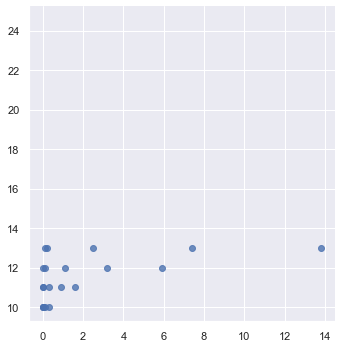

In [76]:
sns.lmplot(x="CUMULATIVE RATE", y="MMWR-WEEK", data = covid_df)

I now feel like the regression plots were a waste and I feel like I don't really understand what regression is.

Heatmaps and clustered maps

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from scipy import stats
from numpy.random import randn
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from scipy import stats
from numpy.random import randn
%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Using .pivot and passing the row you want, column you want, and data for the field allows you to create a pivot table out of the generic dataframe with ease.

In [3]:
flight_dframe = flight_dframe.pivot("month", "year", "passengers")

In [4]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


This sort of pivot table is perfect for a heat map

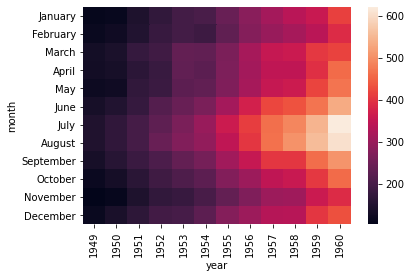

In [6]:
sns.heatmap(flight_dframe)

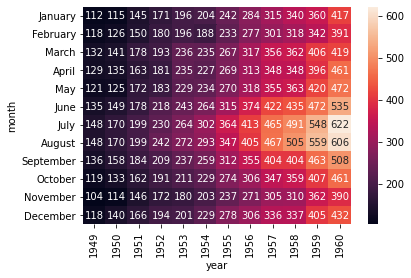

In [7]:
sns.heatmap(flight_dframe,annot=True, fmt='d')

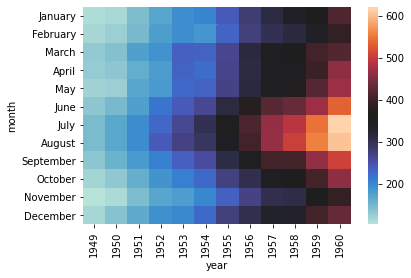

In [10]:
sns.heatmap(flight_dframe,center = flight_dframe.loc['January',1959])

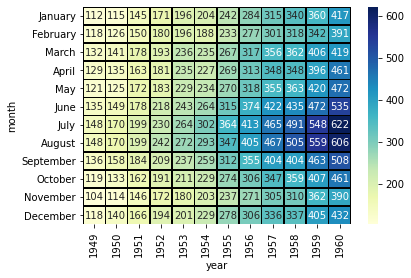

In [12]:
sns.heatmap(flight_dframe,annot=True, fmt='d', linewidths = 0.5, linecolor = 'black',cmap = 'YlGnBu')

It is pretty easy to figure out what you can do with the shift tab tooltips.  I dig it and figured out a few more tricks.  I may take another shot at the regression plots when I better understand more about them.

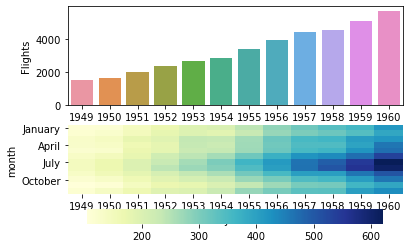

In [23]:
f,(axis1,axis2) = plt.subplots (2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis = 1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year',y='Flights', data= year_dframe,ax=axis1)

sns.heatmap(flight_dframe,cmap='YlGnBu', ax=axis2,cbar_kws={'orientation':'horizontal'})

Cluster map is like a heat map with similar rows next to each other

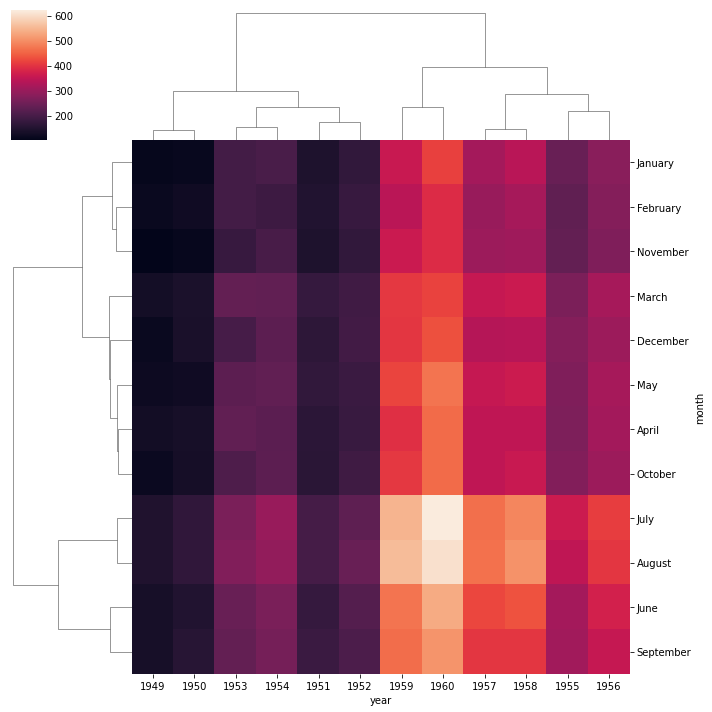

In [25]:
sns.clustermap(flight_dframe)

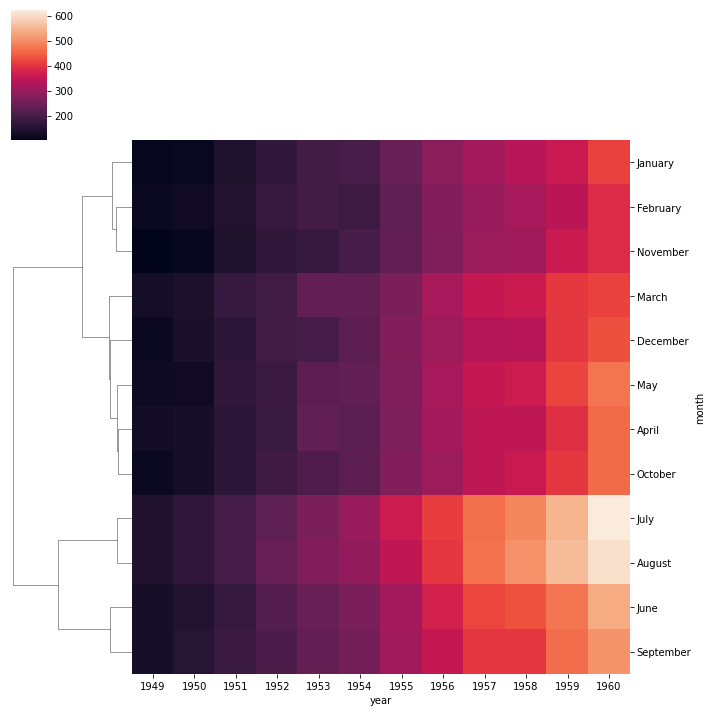

In [26]:
#to uncluser the columns
sns.clustermap(flight_dframe, col_cluster = False)

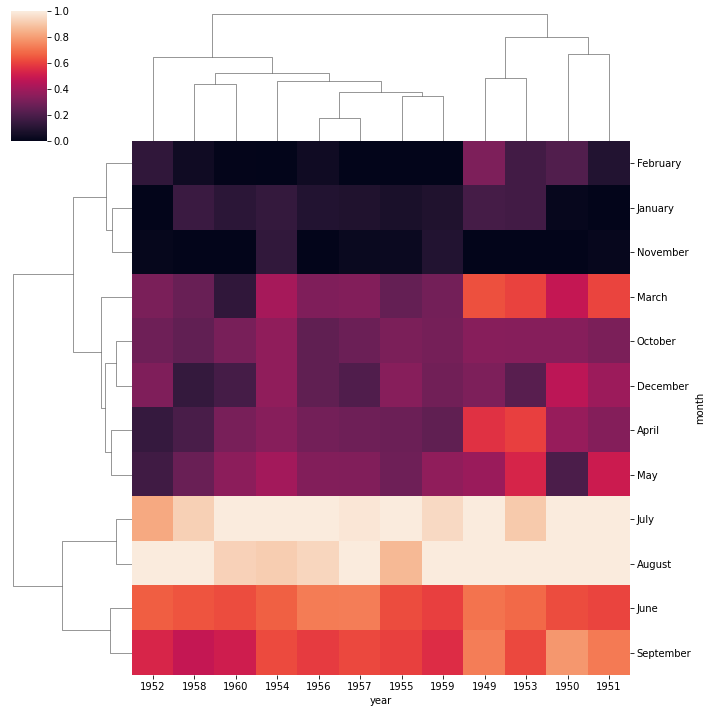

In [27]:
sns.clustermap(flight_dframe,standard_scale=1)

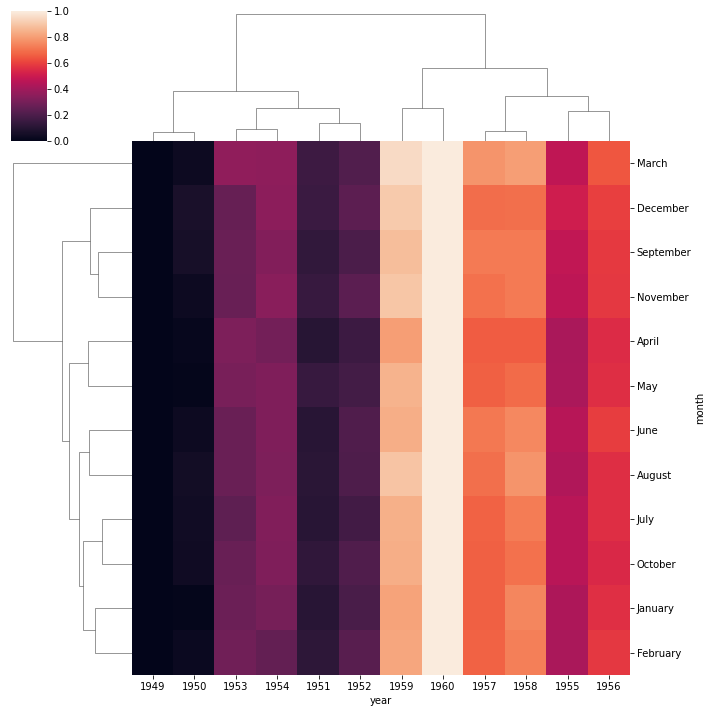

In [28]:
sns.clustermap(flight_dframe,standard_scale=0)

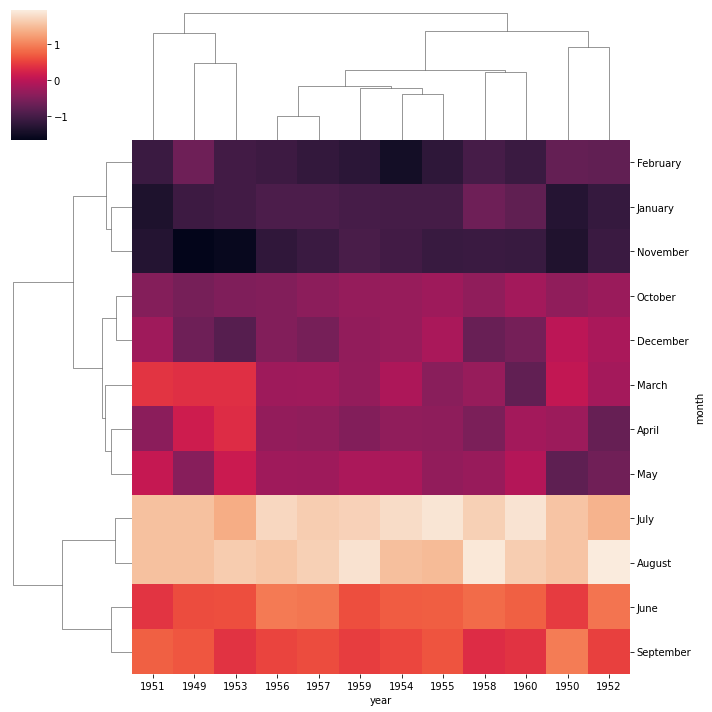

In [29]:
#to divide by Z score
sns.clustermap(flight_dframe,z_score=1)